In [73]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("./data/vwcars.csv") 

df["logprice"] = np.log(df["price"])
df["lp100"] = 282.48 / df["mpg"]
df["age"] = 2021 - df["year"]
df.describe()

,price,year,mileage,mpg,engineSize,tax,logprice,lp100,age
count,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000,438.000000
mean,14.682285,2017.212329,25.106171,58.724201,1.473744,96.803653,2.541854,5.108284,3.787671
std,7.745461,1.955602,25.037824,17.748425,0.423098,61.650174,0.548676,1.191943,1.955602
min,3.495000,2006.000000,1.201000,32.500000,1.000000,0.000000,1.251333,1.701687,1.000000
25%,7.781000,2016.000000,6.053500,50.400000,1.000000,20.000000,2.051684,4.400000,2.000000
50%,11.999000,2017.000000,17.526000,60.100000,1.500000,145.000000,2.484823,4.700166,4.000000
75%,20.990000,2019.000000,33.368000,64.200000,2.000000,145.000000,3.044046,5.604762,5.000000
max,38.990000,2020.000000,138.570000,166.000000,2.000000,265.000000,3.663305,8.691692,15.000000


In [52]:
# estimate the two linear models:

model = ols("price ~ mileage + engineSize + tax + lp100 + age", df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     355.9
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          1.14e-150
Time:                        13:03:03   Log-Likelihood:                -1160.0
No. Observations:                 438   AIC:                             2332.
Df Residuals:                     432   BIC:                             2357.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.1921      1.274     -0.936      0.3

In [53]:
model = ols("logprice ~ mileage + engineSize + tax + lp100 + age", df).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     428.8
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          5.77e-165
Time:                        13:03:03   Log-Likelihood:                 32.957
No. Observations:                 438   AIC:                            -53.91
Df Residuals:                     432   BIC:                            -29.42
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.7947      0.084     21.458      0.0

In [54]:
# comparison:
# model with logprice has better R² 0.832 vs 0.805


In [55]:
# best subset selection:
from sympy.utilities.iterables import multiset_combinations
y = "logprice"
vars = ["mileage","engineSize","tax","lp100", "age" ]
allvarcombinations = [None, 
list(multiset_combinations(vars,1)),
list(multiset_combinations(vars,2)),
list(multiset_combinations(vars,3)),
list(multiset_combinations(vars,4)),
list(multiset_combinations(vars,5))]
models = []
# models with one predictor:
print("All Models to consider for Subset selection:")
for i in range(1,6):
    print("\n number of predictors: " + str(i) + "\n")
    combs = allvarcombinations[i]
    for c in combs:
        modelformula = y + " ~ " + " + ".join(c)
        models.append({"i": i, "formula": modelformula, "model": None})
        print(modelformula)


All Models to consider for Subset selection:

 number of predictors: 1

logprice ~ age
logprice ~ engineSize
logprice ~ lp100
logprice ~ mileage
logprice ~ tax

 number of predictors: 2

logprice ~ age + engineSize
logprice ~ age + lp100
logprice ~ age + mileage
logprice ~ age + tax
logprice ~ engineSize + lp100
logprice ~ engineSize + mileage
logprice ~ engineSize + tax
logprice ~ lp100 + mileage
logprice ~ lp100 + tax
logprice ~ mileage + tax

 number of predictors: 3

logprice ~ age + engineSize + lp100
logprice ~ age + engineSize + mileage
logprice ~ age + engineSize + tax
logprice ~ age + lp100 + mileage
logprice ~ age + lp100 + tax
logprice ~ age + mileage + tax
logprice ~ engineSize + lp100 + mileage
logprice ~ engineSize + lp100 + tax
logprice ~ engineSize + mileage + tax
logprice ~ lp100 + mileage + tax

 number of predictors: 4

logprice ~ age + engineSize + lp100 + mileage
logprice ~ age + engineSize + lp100 + tax
logprice ~ age + engineSize + mileage + tax
logprice ~ age + 

In [56]:
# calulate models:
for m in models:
    mod = ols(m["formula"], df).fit()
    m["model"] = mod
    m["AIC"] = m["model"].aic
    m["BIC"]= m["model"].bic
print(models)

[{'i': 1, 'formula': 'logprice ~ age', 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000027152DF8CD0>, 'AIC': 358.5234128593049, 'BIC': 366.6878506800578}, {'i': 1, 'formula': 'logprice ~ engineSize', 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000002714EB73A30>, 'AIC': 558.6594106996095, 'BIC': 566.8238485203624}, {'i': 1, 'formula': 'logprice ~ lp100', 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000027152DE28E0>, 'AIC': 512.9364737033646, 'BIC': 521.1009115241176}, {'i': 1, 'formula': 'logprice ~ mileage', 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000027152DFCC10>, 'AIC': 600.6570472932226, 'BIC': 608.8214851139755}, {'i': 1, 'formula': 'logprice ~ tax', 'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x0000027152E02880>, 'AIC': 488.36623936255853, 'BIC': 496.5306771833114}, {'i': 2, 'formula': 

In [57]:
# select best model for each number of predictors:
bestmodelsBIC = [None]*6
bestmodelsAIC =  [None]*6
for i in range(1,6):
    imodels = list(filter(lambda m: m["i"] == i,models))
    bicmin = 100000000000
    aicmin = 100000000000
    for m in imodels:
        if(m["AIC"] < aicmin):
            aicmin = m["AIC"]
            bestmodelsAIC[i] = m
        if(m["BIC"] < bicmin):
            bicmin = m["BIC"]
            bestmodelsBIC[i] = m
        
print("Models suggested by AIC")
print([m["AIC"] if m != None else "" for m in bestmodelsAIC])
print("Models suggested by BIC")
print([m["BIC"] if m != None else "" for m in bestmodelsBIC])

# as expected both AIC and BIC give the same models for each number of predictors.
# they are:

"""

AICS: ['', 358.5234128593049, 58.46063583089153, -25.641701463431446, -48.1132671600119, -53.914542564533576]
BICS: ['', 366.6878506800578, 70.70729256202087, -9.31282582192566, -27.70217260812967, -29.4212291022749]

logprice ~ age
logprice ~ age + engineSize
logprice ~ age + engineSize + mileage
logprice ~ age + engineSize + mileage + lp100 
logprice ~ age + engineSize + mileage + lp100 + tax

"""  

# best model is the model with the 3 predictors, according to AIC and BIC


Models suggested by AIC
['', 358.5234128593049, 58.46063583089153, -25.641701463431446, -48.1132671600119, -53.914542564533576]
Models suggested by BIC
['', 366.6878506800578, 70.70729256202087, -9.31282582192566, -27.70217260812967, -29.4212291022749]


"\n\nAICS: ['', 358.5234128593049, 58.46063583089153, -25.641701463431446, -48.1132671600119, -53.914542564533576]\nBICS: ['', 366.6878506800578, 70.70729256202087, -9.31282582192566, -27.70217260812967, -29.4212291022749]\n\nlogprice ~ age\nlogprice ~ age + engineSize\nlogprice ~ age + engineSize + mileage\nlogprice ~ age + engineSize + mileage + lp100 \nlogprice ~ age + engineSize + mileage + lp100 + tax\n\n"

In [75]:
# best model:

model = ols("logprice ~ age + engineSize + mileage", df)
modelfit = model.fit()

"""
model parameters:
                coef	std err	t	    P>|t|	[0.025	0.975]
Intercept	    2.1756	0.053	41.201	0.000	2.072	2.279
age	            -0.1410	0.008	-17.734	0.000	-0.157	-0.125
engineSize	    0.7152	0.029	24.874	0.000	0.659	0.772
mileage	        -0.0061	0.001	-9.710	0.000	-0.007	-0.005

"""

print(modelfit.summary())


                            OLS Regression Results                            
Dep. Variable:               logprice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     656.7
Date:                Sun, 19 Dec 2021   Prob (F-statistic):          7.00e-161
Time:                        13:34:59   Log-Likelihood:                 16.821
No. Observations:                 438   AIC:                            -25.64
Df Residuals:                     434   BIC:                            -9.313
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1756      0.053     41.201      0.0

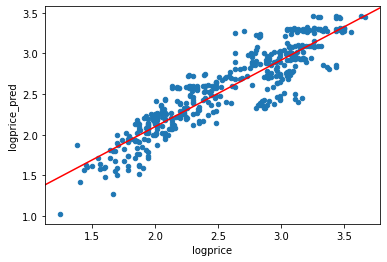

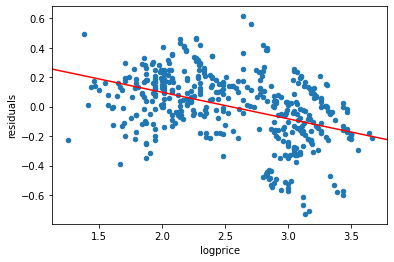

2.2530866061742927e-12


In [87]:
from statsmodels.graphics.regressionplots import abline_plot
# prediction plot
y = df["logprice"]
df["logprice_pred"] = modelfit.predict(df)
df["residuals"] = df["logprice_pred"] - df["logprice"]
# scatter-plot regression
ax = df.plot(x='logprice', y='logprice_pred', kind='scatter')
abline_plot(model_results=ols("logprice_pred ~ logprice", df).fit(), ax=ax, color="red")
plt.show()

# scatter-plot residuals

ax = df.plot(x='logprice', y='residuals', kind='scatter')
abline_plot(model_results=ols("residuals ~ logprice", df).fit(), ax=ax, color="red")
plt.show()

# residuals sum up to 0 but are not uncorrelated with logprice. Therefore no good model fit yet.

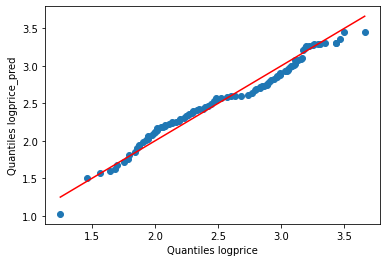

In [92]:
# qq plot with normal distribution:
linelimit = 3
quantilecount = 100
quantilesReal = []
quantilesPredicted = []
for i in range(quantilecount+1):
    q = i/quantilecount
    quantilesReal.append((np.quantile(df["logprice"],q)))
    quantilesPredicted.append((np.quantile(df["logprice_pred"],q)))
fig, ax = plt.subplots()
ax.set_xlabel("Quantiles logprice")
ax.set_ylabel("Quantiles logprice_pred")
plt.scatter(x= quantilesReal, y=quantilesPredicted)
plt.plot(quantilesReal, quantilesReal, color="red")
#plt.plot([-linelimit,linelimit],[-linelimit,linelimit])
plt.show()